## Загрузка и исследовательский анализ данных

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gdown

In [105]:
url = 'https://docs.google.com/spreadsheets/d/1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ/edit?usp=sharing&ouid=108853664472972134783&rtpof=true&sd=true'
output_path = 'concat_sample.xlsx'
gdown.download(url, output_path, quiet=False, fuzzy=True)
data = pd.read_excel(output_path)
data

Downloading...
From: https://drive.google.com/uc?id=1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ
To: C:\Users\potkd\jupyter\my_projects\concat_sample.xlsx
100%|█████████████████████████████████████████████████████████████████████████████| 27.5k/27.5k [00:00<00:00, 9.03MB/s]


,date,key_rate,USD,unemployment,MIACR,SA_M2,inf_exp,key_rate_lag_1,key_rate_lag_3,key_rate_lag_6,...,MIACR_lag_1,MIACR_lag_3,MIACR_lag_6,SA_M2_lag_1,SA_M2_lag_3,SA_M2_lag_6,inf_exp_lag_1,inf_exp_lag_3,inf_exp_lag_6,inflation
0,1.2014,5.5,35.18,0.056,6.06,29537.758538,12.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.07
1,2.2014,5.5,36.05,0.056,5.99,29735.232452,11.80,5.5,NaN,NaN,...,6.06,NaN,NaN,29537.758538,NaN,NaN,12.40,NaN,NaN,6.21
2,3.2014,7.0,35.05,0.054,7.85,29966.288667,11.65,5.5,NaN,NaN,...,5.99,NaN,NaN,29735.232452,NaN,NaN,11.80,NaN,NaN,6.92
3,4.2014,7.5,35.63,0.053,7.87,29375.261508,11.50,7.0,5.5,NaN,...,7.85,6.06,NaN,29966.288667,29537.758538,NaN,11.65,12.4,NaN,7.33
4,5.2014,7.5,34.92,0.049,8.21,29824.222698,12.70,7.5,5.5,NaN,...,7.87,5.99,NaN,29375.261508,29735.232452,NaN,11.50,11.8,NaN,7.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,9.2022,7.5,58.45,0.039,7.68,73861.255205,12.50,8.0,9.5,20.0,...,7.94,9.63,19.87,71649.959585,69081.524241,66184.259711,12.00,12.4,18.3,13.68
105,10.2022,7.5,61.48,0.039,7.67,75295.035678,12.80,7.5,8.0,17.0,...,7.68,8.90,17.08,73861.255205,69745.601958,67819.899723,12.50,10.8,12.5,12.63
106,11.2022,7.5,60.99,0.037,7.31,76905.829733,12.20,7.5,8.0,11.0,...,7.67,7.94,13.25,75295.035678,71649.959585,68090.506963,12.80,12.0,11.5,11.98
107,12.2022,7.5,69.90,0.037,7.31,77977.521475,12.10,7.5,7.5,9.5,...,7.31,7.68,9.63,76905.829733,73861.255205,69081.524241,12.20,12.5,12.4,11.94


In [106]:
data = data.iloc[8:, :]
data.reset_index(inplace=True, drop=True)
data.head(10)

,date,key_rate,USD,unemployment,MIACR,SA_M2,inf_exp,key_rate_lag_1,key_rate_lag_3,key_rate_lag_6,...,MIACR_lag_1,MIACR_lag_3,MIACR_lag_6,SA_M2_lag_1,SA_M2_lag_3,SA_M2_lag_6,inf_exp_lag_1,inf_exp_lag_3,inf_exp_lag_6,inflation
0,9.2014,8.0,39.57,0.049,7.95,30566.453628,12.5,8.0,7.5,7.0,...,7.88,8.23,7.85,30330.951084,29826.981754,29966.288667,11.8,11.7,11.65,8.03
1,10.2014,8.0,43.03,0.051,8.24,30736.744857,13.8,8.0,8.0,7.5,...,7.95,8.17,7.87,30566.453628,29965.108154,29375.261508,12.5,11.3,11.50,8.29
2,11.2014,9.5,50.41,0.052,10.21,30687.329065,13.1,8.0,8.0,7.5,...,8.24,7.88,8.21,30736.744857,30330.951084,29824.222698,13.8,11.8,12.70,9.06
3,12.2014,17.0,55.91,0.053,15.47,30753.520091,15.5,9.5,8.0,7.5,...,10.21,7.95,8.23,30687.329065,30566.453628,29826.981754,13.1,12.5,11.70,11.35
4,1.2015,17.0,68.86,0.055,16.96,30813.965221,16.6,17.0,8.0,8.0,...,15.47,8.24,8.17,30753.520091,30736.744857,29965.108154,15.5,13.8,11.30,14.96
5,2.2015,15.0,61.62,0.058,15.12,30916.346879,18.1,17.0,9.5,8.0,...,16.96,10.21,7.88,30813.965221,30687.329065,30330.951084,16.6,13.1,11.80,16.70
6,3.2015,14.0,58.20,0.059,14.90,30986.101967,15.7,15.0,17.0,8.0,...,15.12,15.47,7.95,30916.346879,30753.520091,30566.453628,18.1,15.5,12.50,16.90
7,4.2015,14.0,51.65,0.058,14.36,30823.431605,14.0,14.0,17.0,8.0,...,14.90,16.96,8.24,30986.101967,30813.965221,30736.744857,15.7,16.6,13.80,16.40
8,5.2015,12.5,52.32,0.056,12.83,31566.075251,14.3,14.0,15.0,9.5,...,14.36,15.12,10.21,30823.431605,30916.346879,30687.329065,14.0,18.1,13.10,15.80
9,6.2015,11.5,55.28,0.054,12.50,31674.770675,15.0,12.5,14.0,17.0,...,12.83,14.90,15.47,31566.075251,30986.101967,30753.520091,14.3,15.7,15.50,15.30


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                101 non-null    float64
 1   key_rate            101 non-null    float64
 2   USD                 101 non-null    float64
 3   unemployment        101 non-null    float64
 4   MIACR               101 non-null    float64
 5   SA_M2               101 non-null    float64
 6   inf_exp             101 non-null    float64
 7   key_rate_lag_1      101 non-null    float64
 8   key_rate_lag_3      101 non-null    float64
 9   key_rate_lag_6      101 non-null    float64
 10  USD_lag_1           101 non-null    float64
 11  USD_lag_3           101 non-null    float64
 12  USD_lag_6           101 non-null    float64
 13  unemployment_lag_1  101 non-null    float64
 14  unemployment_lag_3  101 non-null    float64
 15  unemployment_lag_6  101 non-null    float64
 16  MIACR_la

## Применение модели линейной регрессии

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [109]:
X = data.iloc[:, 1:25].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [110]:
lin_model = LinearRegression()

In [111]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [112]:
print(f'MSE на тренировочной выборке: {mean_squared_error(lin_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(lin_model.predict(X_test), y_test):.3f}')
MSE_1 = f'MSE = {mean_squared_error(lin_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 1.638
MSE на тестовой выборке: 2.987


In [113]:
r2_1 = f'R_square = {r2_score(lin_model.predict(X), y):.3f}'

Text(40, 10, 'R_square = 0.904')

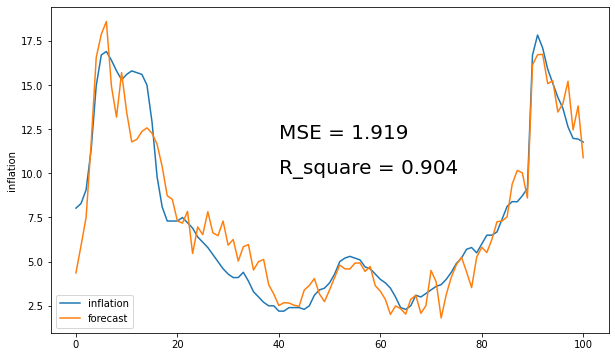

In [114]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=lin_model.predict(X), label='forecast')
axes.text(40, 12, MSE_1, fontsize=20)
axes.text(40, 10, r2_1, fontsize=20)

## Применение градиентного бустинга на решающих деревьях

In [115]:
from catboost import CatBoostRegressor

In [116]:
boost_model = CatBoostRegressor()

In [117]:
boost_model.fit(X_train, y_train, verbose=False)

In [118]:
print(f'MSE на тренировочной выборке: {mean_squared_error(boost_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(boost_model.predict(X_test), y_test):.3f}')

MSE на тренировочной выборке: 0.000
MSE на тестовой выборке: 0.906


<AxesSubplot:ylabel='inflation'>

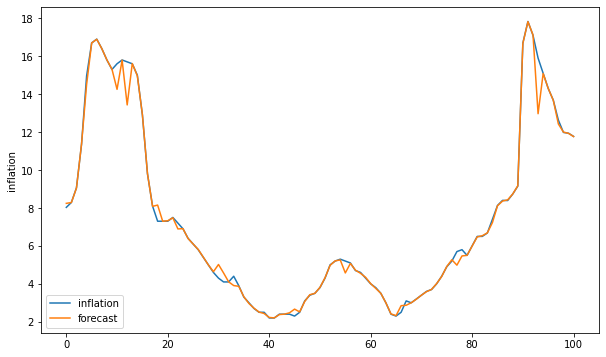

In [119]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=boost_model.predict(X), label='forecast')

In [120]:
r2_score(boost_model.predict(X), y)

0.9909000440180685

In [121]:
best_model = CatBoostRegressor(n_estimators=2000, depth=4)

In [122]:
best_model.fit(X_train, y_train, verbose=False)

In [123]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
print(f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}')
MSE_1 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_1 = f'R_square = {r2_score(boost_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.002
MSE на тестовой выборке: 0.591
MSE = 0.124


Text(50, 10, 'R_square = 0.991')

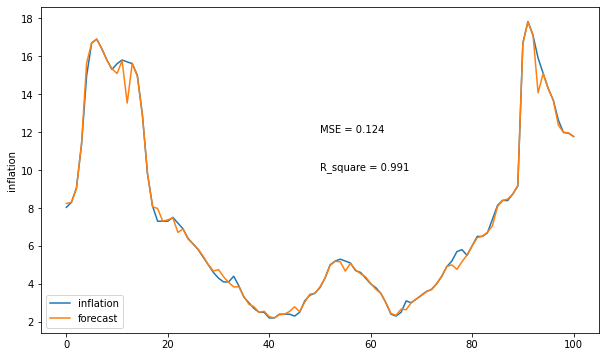

In [124]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, MSE_1)
axes.text(50, 10, r2_1)

In [125]:
feature_importance = pd.Series(data=best_model.get_feature_importance(), index=data.columns[1:25])

In [126]:
df = pd.DataFrame(data=feature_importance.sort_values(ascending=False).head(10))

In [127]:
df[0] = round(df[0], 2)
df.columns=['Влияние, %']
df.index = ['MIACR', 'MIACR в пред. мес.', 'Ожидаемая инфляция', 'Денежная масса M2', 'Ключевая ставка в пред. мес.', 'Ожидаемая инфляция 3 мес. назад', 'Денежная масса 6 мес. назад', 'Ключевая ставка', 'Уровень безработицы в пред. мес.', 'Денежная масса 3 мес. назад']
df

,"Влияние, %"
MIACR,12.17
MIACR в пред. мес.,8.05
Ожидаемая инфляция,7.21
Денежная масса M2,7.21
Ключевая ставка в пред. мес.,6.57
Ожидаемая инфляция 3 мес. назад,6.45
Денежная масса 6 мес. назад,6.22
Ключевая ставка,5.80
Уровень безработицы в пред. мес.,5.51
Денежная масса 3 мес. назад,5.19


[Text(0, 0, '12.17'),
 Text(0, 0, '8.05'),
 Text(0, 0, '7.21'),
 Text(0, 0, '7.21'),
 Text(0, 0, '6.57'),
 Text(0, 0, '6.45'),
 Text(0, 0, '6.22'),
 Text(0, 0, '5.8'),
 Text(0, 0, '5.51'),
 Text(0, 0, '5.19')]

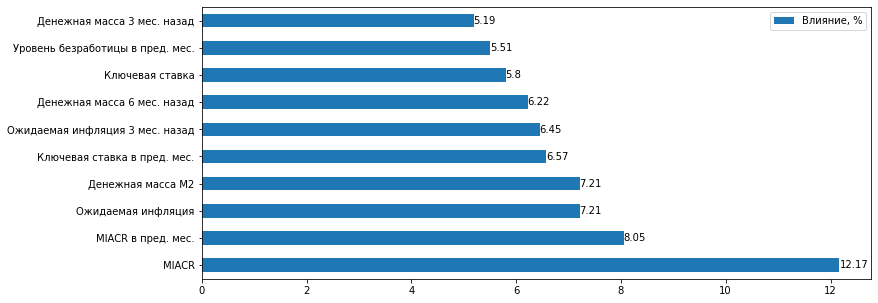

In [128]:
ax = df.plot.barh(figsize=(12, 5))
ax.bar_label(ax.containers[0])

In [129]:
feature_cols = [
    'SA_M2_lag_3',
    'unemployment_lag_1',
    'SA_M2_lag_6', 
    'inf_exp_lag_3',
    'key_rate_lag_1',
    'SA_M2',
    'inf_exp',
    'key_rate',
    'MIACR_lag_1',
    'MIACR', 
]

In [130]:
X = data[feature_cols].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [132]:
best_model = CatBoostRegressor(n_estimators=500, depth=4)

In [133]:
best_model.fit(X_train, y_train, verbose=False)

In [134]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
MSE_2 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_2 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.012
MSE на тестовой выборке: 0.799


Text(50, 10, 'R_square = 0.992')

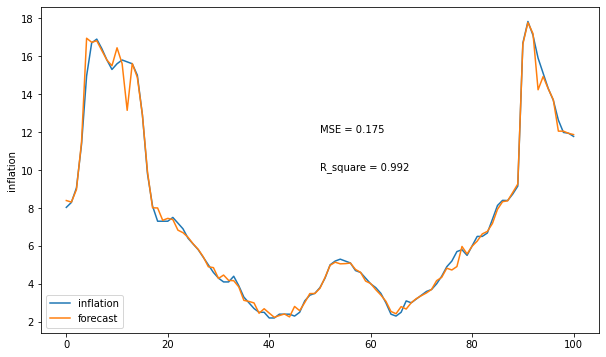

In [135]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, MSE_2)
axes.text(50, 10, r2_2)

In [136]:
feature_cols = [
    'SA_M2_lag_3',
    'inf_exp_lag_3',
    'key_rate_lag_1',
    'key_rate'
]
# попробуем использовать модель для прогноза по меньшему числу факторов-признаков

In [137]:
X = data[feature_cols].values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=39)

In [139]:
best_model = CatBoostRegressor(n_estimators=4000, depth=4)

In [140]:
best_model.fit(X_train, y_train, verbose=False)

In [141]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
MSE_3 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_3 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.008
MSE на тестовой выборке: 0.834


Text(46, 9, 'depth = 4')

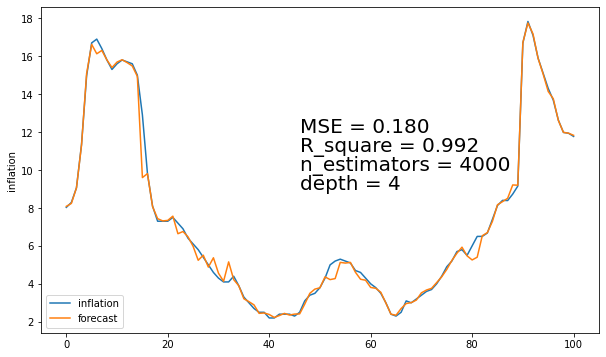

In [142]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(46, 12, MSE_3, fontsize=20)
axes.text(46, 11, r2_3, fontsize=20)
axes.text(46, 10, 'n_estimators = 4000', fontsize=20)
axes.text(46, 9, 'depth = 4', fontsize=20)